In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file = 'Otodom_3p'
file = 'otodomScrapRAWData'
df = pd.read_csv(file + '.csv')
df.shape

(17478, 14)

In [3]:
df.head(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link
0,2024-06-09 17:11:35,4-pokojowe-mieszkanie-73m2-balkon-bezposrednio...,1 109 400 zł,4-pokojowe mieszkanie 73m2 + balkon Bezpośrednio,"73,06 m²",4,1/7,pełna własność,do wykończenia,balkon,garaż/miejsce parkingowe,NaN,https://www.otodom.pl/pl/oferta/4-pokojowe-mie...,"https://www.google.com/maps/@52.1964005,20.952..."
1,2024-06-09 17:11:41,2-pokojowe-mieszkanie-47m2-ogrodek-bezposredni...,Zapytaj o cenę,2-pokojowe mieszkanie 47m2 + ogródek Bezpośrednio,"47,87 m²",2,parter/3,pełna własność,do wykończenia,"taras, ogródek",NaN,NaN,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,"https://www.google.com/maps/@52.1128681,20.973..."
2,2024-06-09 17:11:45,lux-3-pokoje-kamienica-centrum-przy-pkin-ID4qVcj,1 255 000 zł,"LUX 3 pokoje, KAMIENICA, Centrum, przy PKiN!",42 m²,3,4/6,pełna własność,do zamieszkania,balkon,NaN,miejskie,https://www.otodom.pl/pl/oferta/lux-3-pokoje-k...,"https://www.google.com/maps/@52.23313,21.019,1..."
3,2024-06-09 17:11:49,conrada-8-2-pokoje-z-ogrodkiem-ID4p6uM,980 000 zł,"Conrada 8, 2 pokoje z ogródkiem",60 m²,2,parter/7,pełna własność,do zamieszkania,ogródek,garaż/miejsce parkingowe,miejskie,https://www.otodom.pl/pl/oferta/conrada-8-2-po...,"https://www.google.com/maps/@52.2722504,20.928..."
4,2024-06-09 17:11:54,sloneczne-mieszkanie-w-okolicy-stacji-metra-ID...,880 000 zł,Sloneczne mieszkanie w okolicy stacji metra,"49,9 m²",2,7/7,NaN,do zamieszkania,NaN,NaN,miejskie,https://www.otodom.pl/pl/oferta/sloneczne-mies...,"https://www.google.com/maps/@52.2387216,20.961..."


In [4]:
df.dtypes

time_scraping             object
otodom_id                 object
price                     object
title                     object
surface_area              object
num_of_room               object
floor                     object
form_of_property          object
finish_condition          object
balcony_garden_terrace    object
parking_space             object
heating                   object
ad_link                   object
map_link                  object
dtype: object

In [5]:
df.isnull().sum()

time_scraping                0
otodom_id                    0
price                        0
title                        0
surface_area                 0
num_of_room                  0
floor                      346
form_of_property          3164
finish_condition          2521
balcony_garden_terrace    4710
parking_space             6532
heating                   5916
ad_link                      0
map_link                     0
dtype: int64

In [6]:
print(df['num_of_room'].value_counts())

# Replace non-numeric values with NaN
df['num_of_room'] = pd.to_numeric(df['num_of_room'].str.strip(), errors='coerce')

# If you want to replace NaN values with a specific integer (e.g., 11), you can do this:
df['num_of_room'].fillna(12.0, inplace=True)

df['num_of_room'] = df['num_of_room'].astype('int16')

num_of_room
2                6256
3                6075
4                2483
1                1792
5                 661
6                 139
7                  47
8                  10
więcej niż 10       7
9                   5
10                  3
Name: count, dtype: int64


In [7]:
df['price'] = pd.to_numeric(df['price'].str.replace('zł', '').str.replace(' ', ''), errors='coerce').astype('Int64')

In [8]:
df['surface_area'] = pd.to_numeric(df['surface_area'].str.replace(',', '.').str.replace('m²', '').str.replace(' ', ''), errors='coerce')

In [9]:
# Split the 'floor' column
df[['floor', 'num_floors_in_building']] = df['floor'].str.split('/', expand=True)

# Replace 'parter' with 0 in the 'floor' column
df['floor'] = df['floor'].replace('parter', '0').replace('> 10', '12')

# Convert 'floor' and 'num_floors_in_building' to numeric
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype('Int16')
df['num_floors_in_building'] = pd.to_numeric(df['num_floors_in_building'], errors='coerce').astype('Int16')

In [10]:
print(df['balcony_garden_terrace'].value_counts())

balcony_garden_terrace
balkon                    8957
ogródek                    991
balkon, taras              826
taras                      638
ogródek, taras             466
balkon, ogródek            374
balkon, ogródek, taras     285
taras, ogródek             145
taras, balkon               78
taras, balkon, ogródek       4
ogródek, balkon              3
balkon, taras, ogródek       1
Name: count, dtype: int64


In [11]:
# Create a dictionary of Polish words and their English translations
translation_dict = {
    'spółdzielcze wł. prawo do lokalu': 'cooperative ownership right to the premises',
    'pełna własność': 'full ownership',
    'udział': 'share',
    'użytkowanie wieczyste / dzierżawa': 'perpetual usufruct / lease 29',

    'do zamieszkania': 'for living',
    'do wykończenia': 'for finishing',
    'do remontu': 'for renovation',

    'winda': 'Elevator',
    'plwnica': 'Laundry',
    'balkon': 'Balcony',
    'taras': 'Terrace',
    'garaz': 'Garage',
    'ogródek': 'Garden',
    
    'garaż/miejsce parkingowe': 'garage/parking space',

    'miejskie': 'municipal',
    'gazowe': 'gas',
    'kotłownia': 'boiler room',
    'elektryczne': 'electric',
    'inne': 'other',
}

# Replace the Polish words with the English translations in the DataFrame
df.replace(translation_dict, inplace=True)

In [12]:
print(df['form_of_property'].value_counts())
print(df['finish_condition'].value_counts())

form_of_property
full ownership                                 13421
cooperative ownership right to the premises      820
share                                             44
perpetual usufruct / lease 29                     29
Name: count, dtype: int64
finish_condition
for living        7721
for finishing     6122
for renovation    1114
Name: count, dtype: int64


In [13]:
print(df['parking_space'].value_counts())
print(df['heating'].value_counts())

parking_space
garage/parking space    10946
Name: count, dtype: int64
heating
municipal        9279
gas              1320
other             655
boiler room       222
electric           83
piece kaflowe       3
Name: count, dtype: int64


In [14]:
# # Define the list of choices
# choices = ['Balkon', 'Taras', 'Garaz', 'Plwnica', 'Winda']

# # Function to generate a string of random choices
# def generate_random_choices(num_choices):
#     return ', '.join(np.random.choice(choices, size=num_choices))

# # Generate a string of random choices for each missing value in 'balcony_garden_terrace'
# random_values = [generate_random_choices(np.random.randint(1, 4)) for _ in range(df['balcony_garden_terrace'].isnull().sum())]

# # Create a Series from the random values with the same index as the missing values in 'balcony_garden_terrace'
# random_values_series = pd.Series(random_values, index=df.loc[df['balcony_garden_terrace'].isnull(), 'balcony_garden_terrace'].index)

# # Fill the missing values in 'balcony_garden_terrace' with the random values
# df['balcony_garden_terrace'].fillna(random_values_series, inplace=True)

In [15]:
print(df['balcony_garden_terrace'].value_counts())

balcony_garden_terrace
Balcony                   8957
Garden                     991
balkon, taras              826
Terrace                    638
ogródek, taras             466
balkon, ogródek            374
balkon, ogródek, taras     285
taras, ogródek             145
taras, balkon               78
taras, balkon, ogródek       4
ogródek, balkon              3
balkon, taras, ogródek       1
Name: count, dtype: int64


In [16]:
df.dtypes

time_scraping              object
otodom_id                  object
price                       Int64
title                      object
surface_area              float64
num_of_room                 int16
floor                       Int16
form_of_property           object
finish_condition           object
balcony_garden_terrace     object
parking_space              object
heating                    object
ad_link                    object
map_link                   object
num_floors_in_building      Int16
dtype: object

In [17]:
# Split the 'balcony_garden_terrace' column values into lists
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].str.split(',')

# Apply the translation to each item in the list and join them back into a comma-separated string
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(
    lambda lst: ', '.join(set([translation_dict.get(item.strip(), item.strip()) for item in lst])) if isinstance(lst, list) else lst
)

In [18]:
# Extract the latitude and longitude from the 'map_link' column
df[['latitude', 'longitude']] = df['map_link'].str.extract('@(.*?),(.*?),', expand=True)

# Convert 'latitude' and 'longitude' to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [19]:
### BOX-Plots: Old model, with 4 columns

# # Select numerical columns
# numerical_cols = df.select_dtypes(include=[np.number])

# # Number of columns and rows for the subplot grid
# num_cols = 4
# num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# # Create a figure and axes with a subplot for each column
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

# # Loop over the columns and create a boxplot for each one
# for i, col in enumerate(numerical_cols.columns):
#     ax = axs[i//num_cols, i%num_cols]
#     numerical_cols[[col]].boxplot(ax=ax)
#     ax.set_title(col)

# # Remove empty subplots
# if len(numerical_cols.columns) % num_cols != 0:
#     for ax in axs.flatten()[len(numerical_cols.columns):]:
#         ax.remove()

# # Show the plot
# plt.tight_layout()
# plt.show()

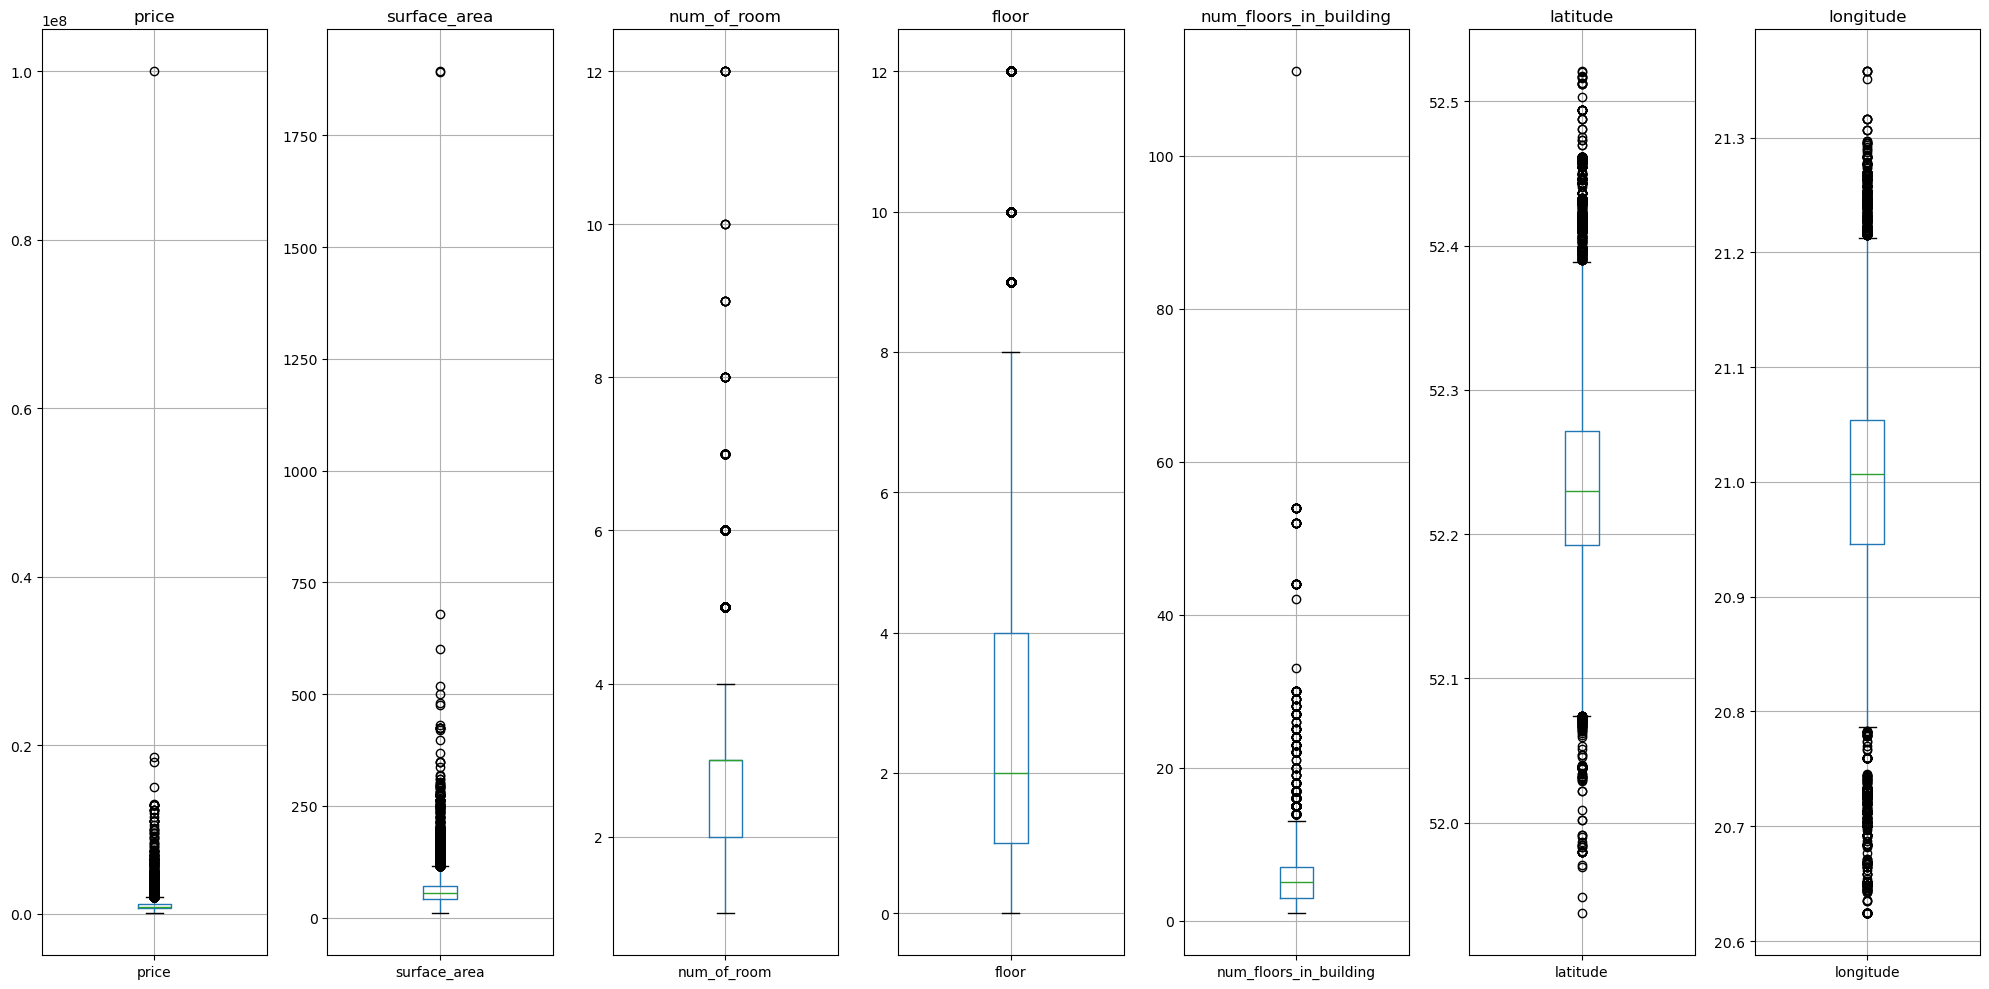

In [20]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Number of columns and rows for the subplot grid
num_cols = 7
num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# Create a figure and axes with a subplot for each column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*10))

# Check if axs is 1-dimensional (i.e., there is only one row of subplots)
if axs.ndim == 1:
    axs = np.expand_dims(axs, 0)

# Loop over the columns and create a boxplot for each one
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//num_cols, i%num_cols]
    numerical_cols[[col]].boxplot(ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(numerical_cols.columns) % num_cols != 0:
    for ax in axs.flatten()[len(numerical_cols.columns):]:
        ax.remove()

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Manually check outliers:
# row = df.nlargest(2, 'price').iloc[-1]
row = df.nlargest(5, 'price').iloc[-1]
print(row)

time_scraping                                           2024-06-11 07:25:28
otodom_id                 dwupoziomowy-apartament-z-tarasem-powisle-ID4nUX1
price                                                              12984000
title                           Dwupoziomowy apartament z tarasem | Powiśle
surface_area                                                         279.32
num_of_room                                                               7
floor                                                                     6
form_of_property                                             full ownership
finish_condition                                              for finishing
balcony_garden_terrace                                                  NaN
parking_space                                                           NaN
heating                                                           municipal
ad_link                   https://www.otodom.pl/pl/oferta/dwupoziomowy-a...
map_link    

In [22]:
df.isnull().sum()

time_scraping                0
otodom_id                    0
price                     2205
title                        0
surface_area                 0
num_of_room                  0
floor                      353
form_of_property          3164
finish_condition          2521
balcony_garden_terrace    4710
parking_space             6532
heating                   5916
ad_link                      0
map_link                     0
num_floors_in_building     819
latitude                     0
longitude                    0
dtype: int64

### Handle the outliers

In [23]:
print('Before: ' + str(df.shape))
# # col_with_outliers = numerical_cols
# col_with_outliers = []

# for col in col_with_outliers:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
#     df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

price_filtered_out = df[df['price'] > 0.3*10e6]
surface_area_filtered_out = df[df['surface_area'] > 750]
num_floors_in_building_filtered_out = df[df['num_floors_in_building'] > 60]

df = df[(df['price'] <= 0.3*10e6) | pd.isna(df['price'])]
df = df[(df['surface_area'] <= 750) | pd.isna(df['surface_area'])]
df = df[(df['num_floors_in_building'] <= 60) | pd.isna(df['num_floors_in_building'])]

# price_filter = df[(df['price'] > 0.2*10e6) & pd.notna(df['price'])]
# surface_area_filter = (df['surface_area'] > 750) & pd.notna(df['surface_area'])
# num_floors_in_building_filter = (df['num_floors_in_building'] > 60) & pd.notna(df['num_floors_in_building'])

print(price_filtered_out.shape)
print(surface_area_filtered_out.shape)
print(num_floors_in_building_filtered_out.shape)

# df = df[~price_filter]
# df = df[~surface_area_filter]
# df = df[~num_floors_in_building_filter]


print('After: ' + str(df.shape))

Before: (17478, 17)
(467, 17)
(2, 17)
(1, 17)
After: (17010, 17)


In [24]:
pd.set_option('display.max_colwidth', None)
print(price_filtered_out.sample(1)[['price', 'ad_link']])

        price  \
4362  3500000   

                                                                                       ad_link  
4362  https://www.otodom.pl/pl/oferta/mieszkanie-bezczynszowe-na-bielanach-przy-metrze-ID4qr95  


In [25]:
df.isnull().sum()

time_scraping                0
otodom_id                    0
price                     2205
title                        0
surface_area                 0
num_of_room                  0
floor                      347
form_of_property          3017
finish_condition          2414
balcony_garden_terrace    4569
parking_space             6392
heating                   5745
ad_link                      0
map_link                     0
num_floors_in_building     803
latitude                     0
longitude                    0
dtype: int64

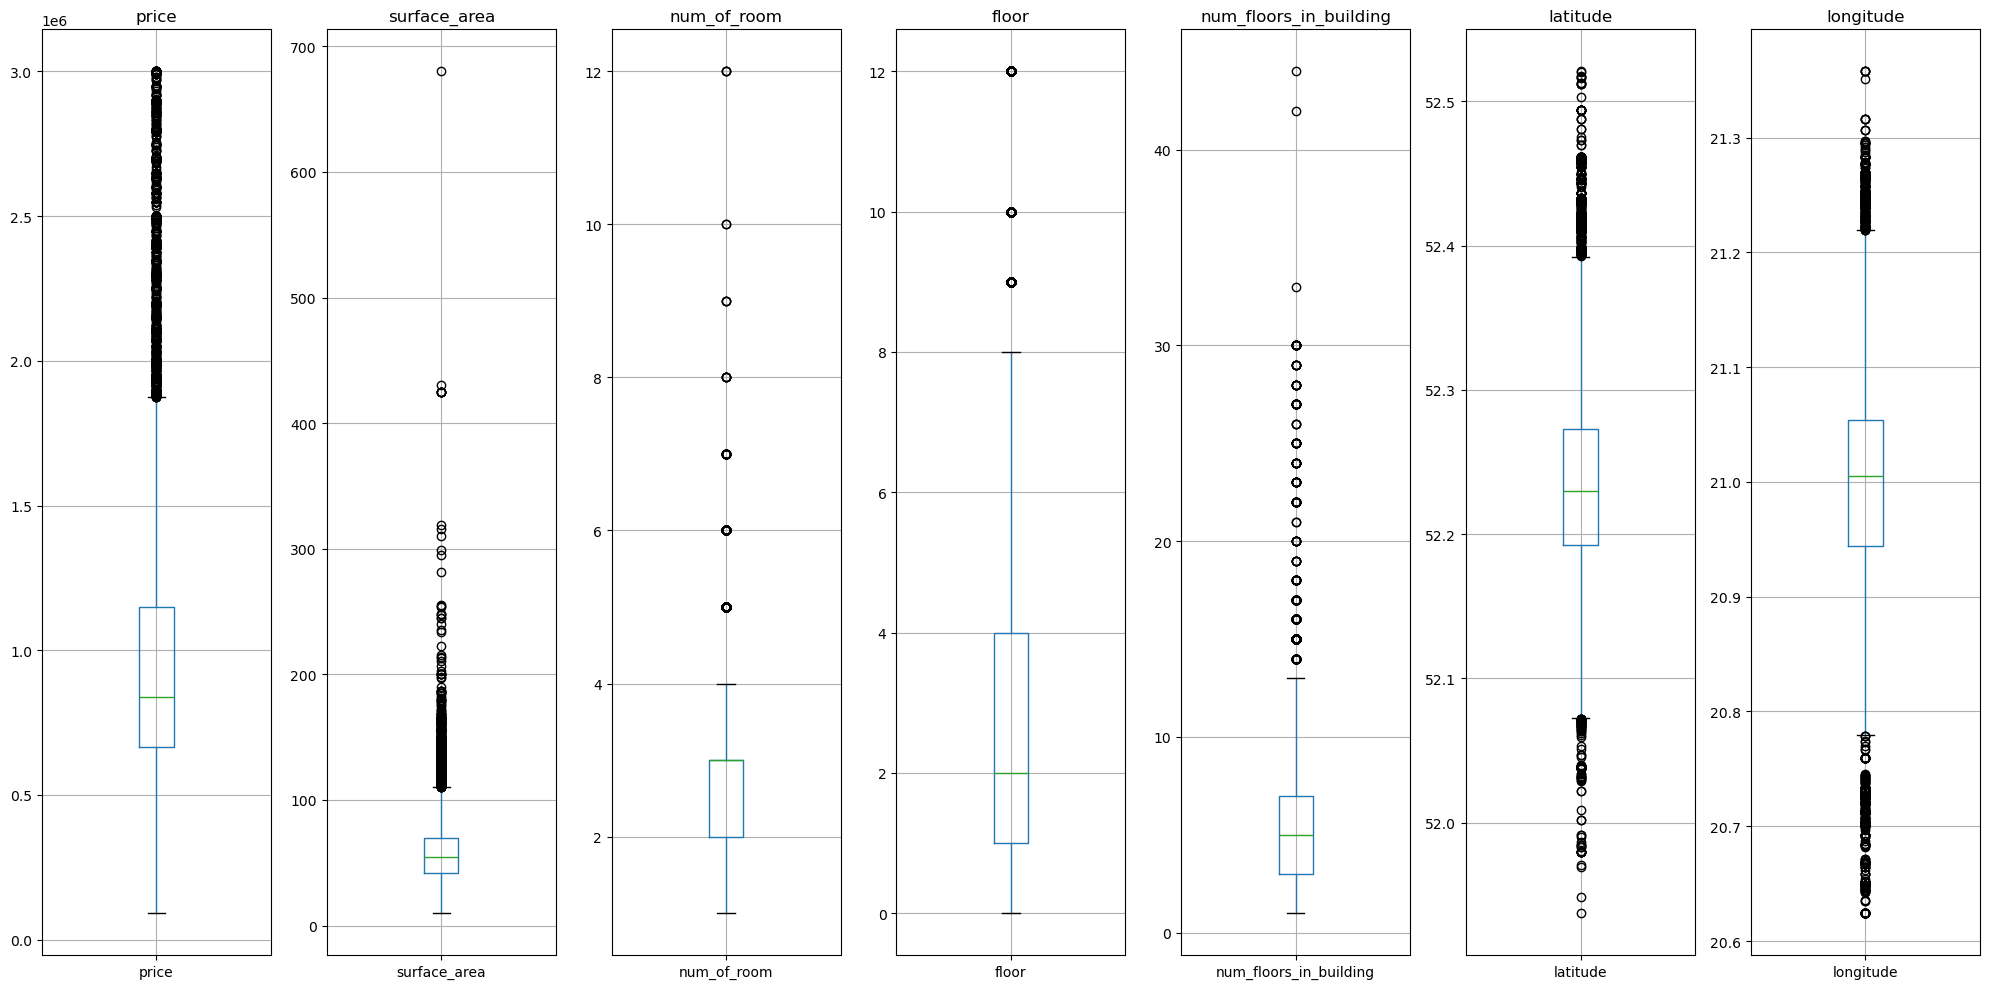

In [26]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Number of columns and rows for the subplot grid
num_cols = 7
num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# Create a figure and axes with a subplot for each column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*10))

# Check if axs is 1-dimensional (i.e., there is only one row of subplots)
if axs.ndim == 1:
    axs = np.expand_dims(axs, 0)

# Loop over the columns and create a boxplot for each one
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//num_cols, i%num_cols]
    numerical_cols[[col]].boxplot(ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(numerical_cols.columns) % num_cols != 0:
    for ax in axs.flatten()[len(numerical_cols.columns):]:
        ax.remove()

# Show the plot
plt.tight_layout()
plt.show()

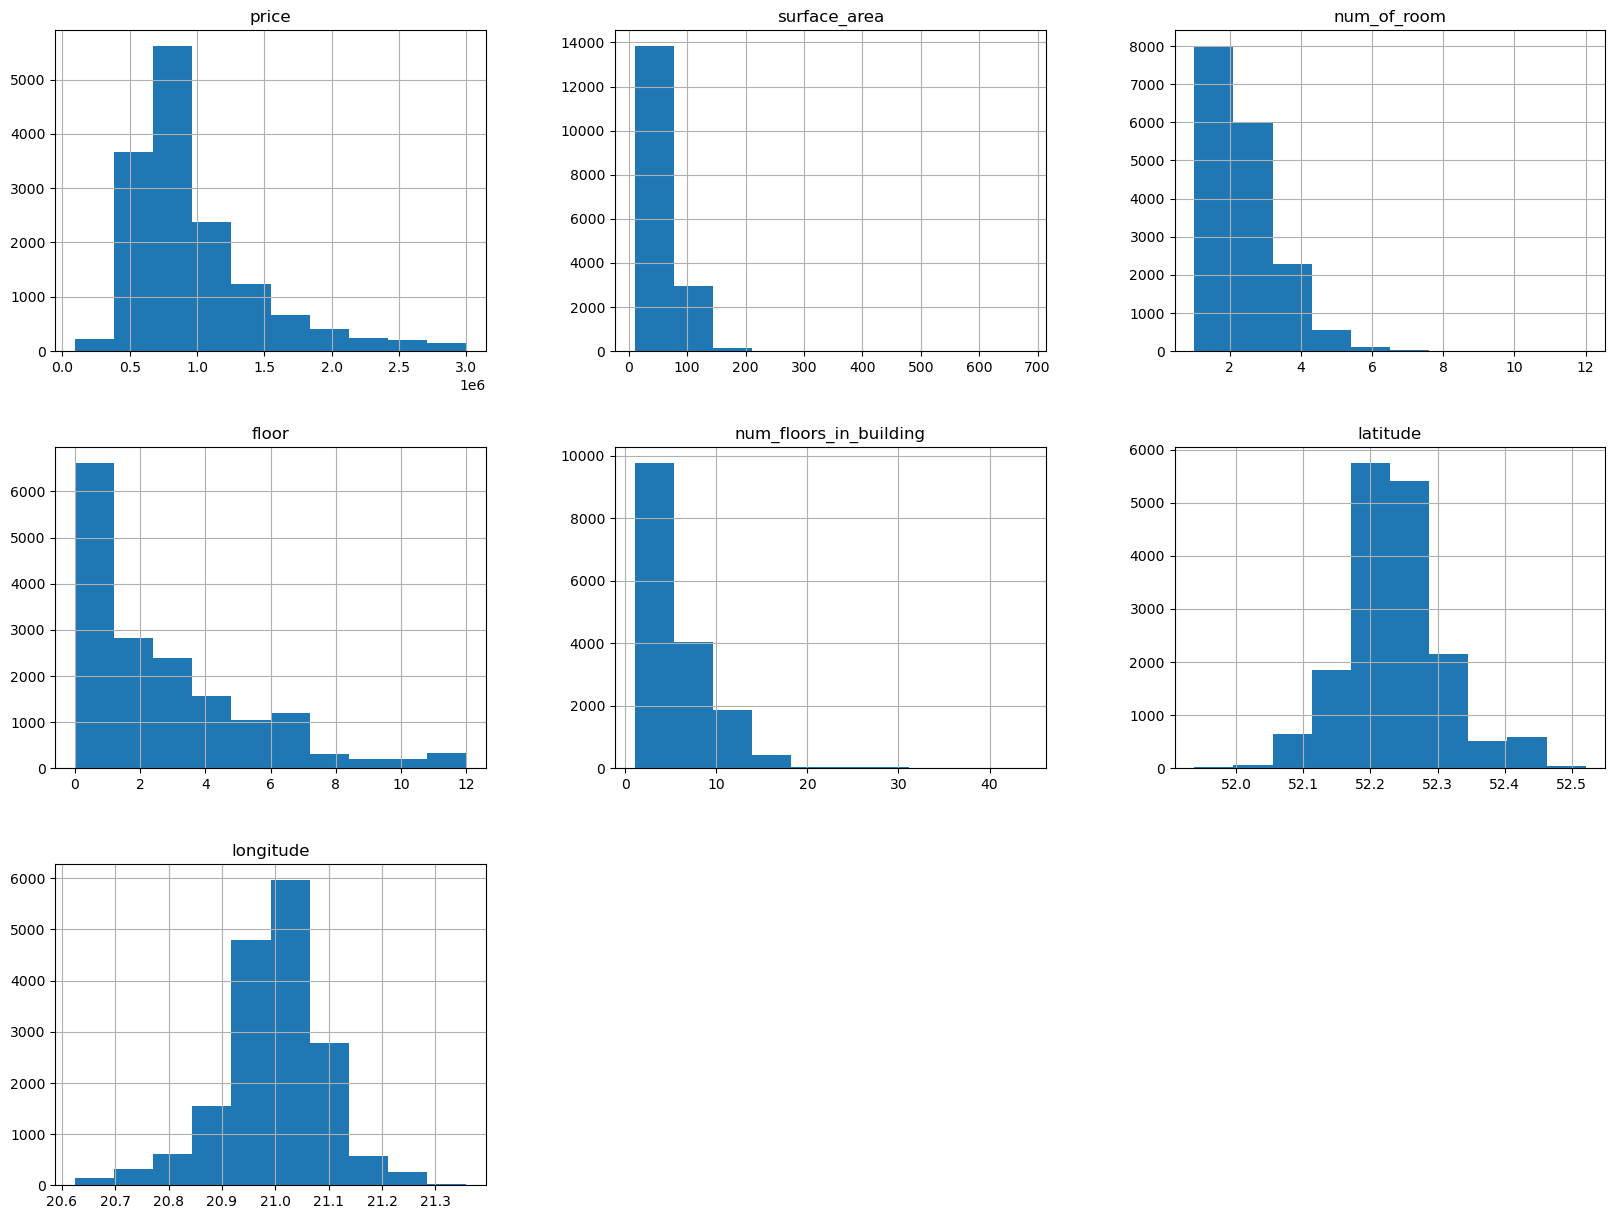

In [27]:
ax = df.hist(figsize=(20,15))

## Step-II: Storing the cleaned data

In [28]:
df_cleaned = df.drop(['time_scraping', 'otodom_id', 'title', 'ad_link', 'map_link'], axis=1)

In [29]:
df_cleaned.head(5)

,price,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,num_floors_in_building,latitude,longitude
0,1109400,73.06,4,1,full ownership,for finishing,Balcony,garage/parking space,NaN,7,52.196401,20.952040
1,<NA>,47.87,2,0,full ownership,for finishing,"Terrace, Garden",NaN,NaN,3,52.112868,20.973348
2,1255000,42.00,3,4,full ownership,for living,Balcony,NaN,municipal,6,52.233130,21.019000
3,980000,60.00,2,0,full ownership,for living,Garden,garage/parking space,municipal,7,52.272250,20.928295
4,880000,49.90,2,7,NaN,for living,NaN,NaN,municipal,7,52.238722,20.961506


In [30]:
new_columns_order = ['price', 'latitude', 'longitude', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building', 'finish_condition', 'form_of_property', 'balcony_garden_terrace', 'parking_space',	'heating']
df_cleaned = df[new_columns_order]

In [31]:
df_cleaned.to_csv(file + '_cleaned.csv', index=False)

In [32]:
df_cleaned.isnull().sum()

price                     2205
latitude                     0
longitude                    0
surface_area                 0
num_of_room                  0
floor                      347
num_floors_in_building     803
finish_condition          2414
form_of_property          3017
balcony_garden_terrace    4569
parking_space             6392
heating                   5745
dtype: int64

In [33]:
# Necessary for the image plotting
print(df_cleaned.shape)
df_cleaned = df_cleaned[df_cleaned['price'].notna()]
print(df_cleaned.shape)
df_cleaned.head(5)

(17010, 12)
(14805, 12)


,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,form_of_property,balcony_garden_terrace,parking_space,heating
0,1109400,52.196401,20.952040,73.06,4,1,7,for finishing,full ownership,Balcony,garage/parking space,NaN
2,1255000,52.233130,21.019000,42.00,3,4,6,for living,full ownership,Balcony,NaN,municipal
3,980000,52.272250,20.928295,60.00,2,0,7,for living,full ownership,Garden,garage/parking space,municipal
4,880000,52.238722,20.961506,49.90,2,7,7,for living,NaN,NaN,NaN,municipal
7,849900,52.100217,21.051637,85.95,3,2,2,for living,full ownership,Balcony,garage/parking space,gas


In [34]:
print("Max & Min Latitude: " + str(max(df_cleaned['latitude'])) + " " + str(min(df_cleaned['latitude'])))
print("Max & Min Longitude: " + str(max(df_cleaned['longitude'])) + " " + str(min(df_cleaned['longitude'])))

Max & Min Latitude: 52.52074 51.93743
Max & Min Longitude: 21.35776 20.624359


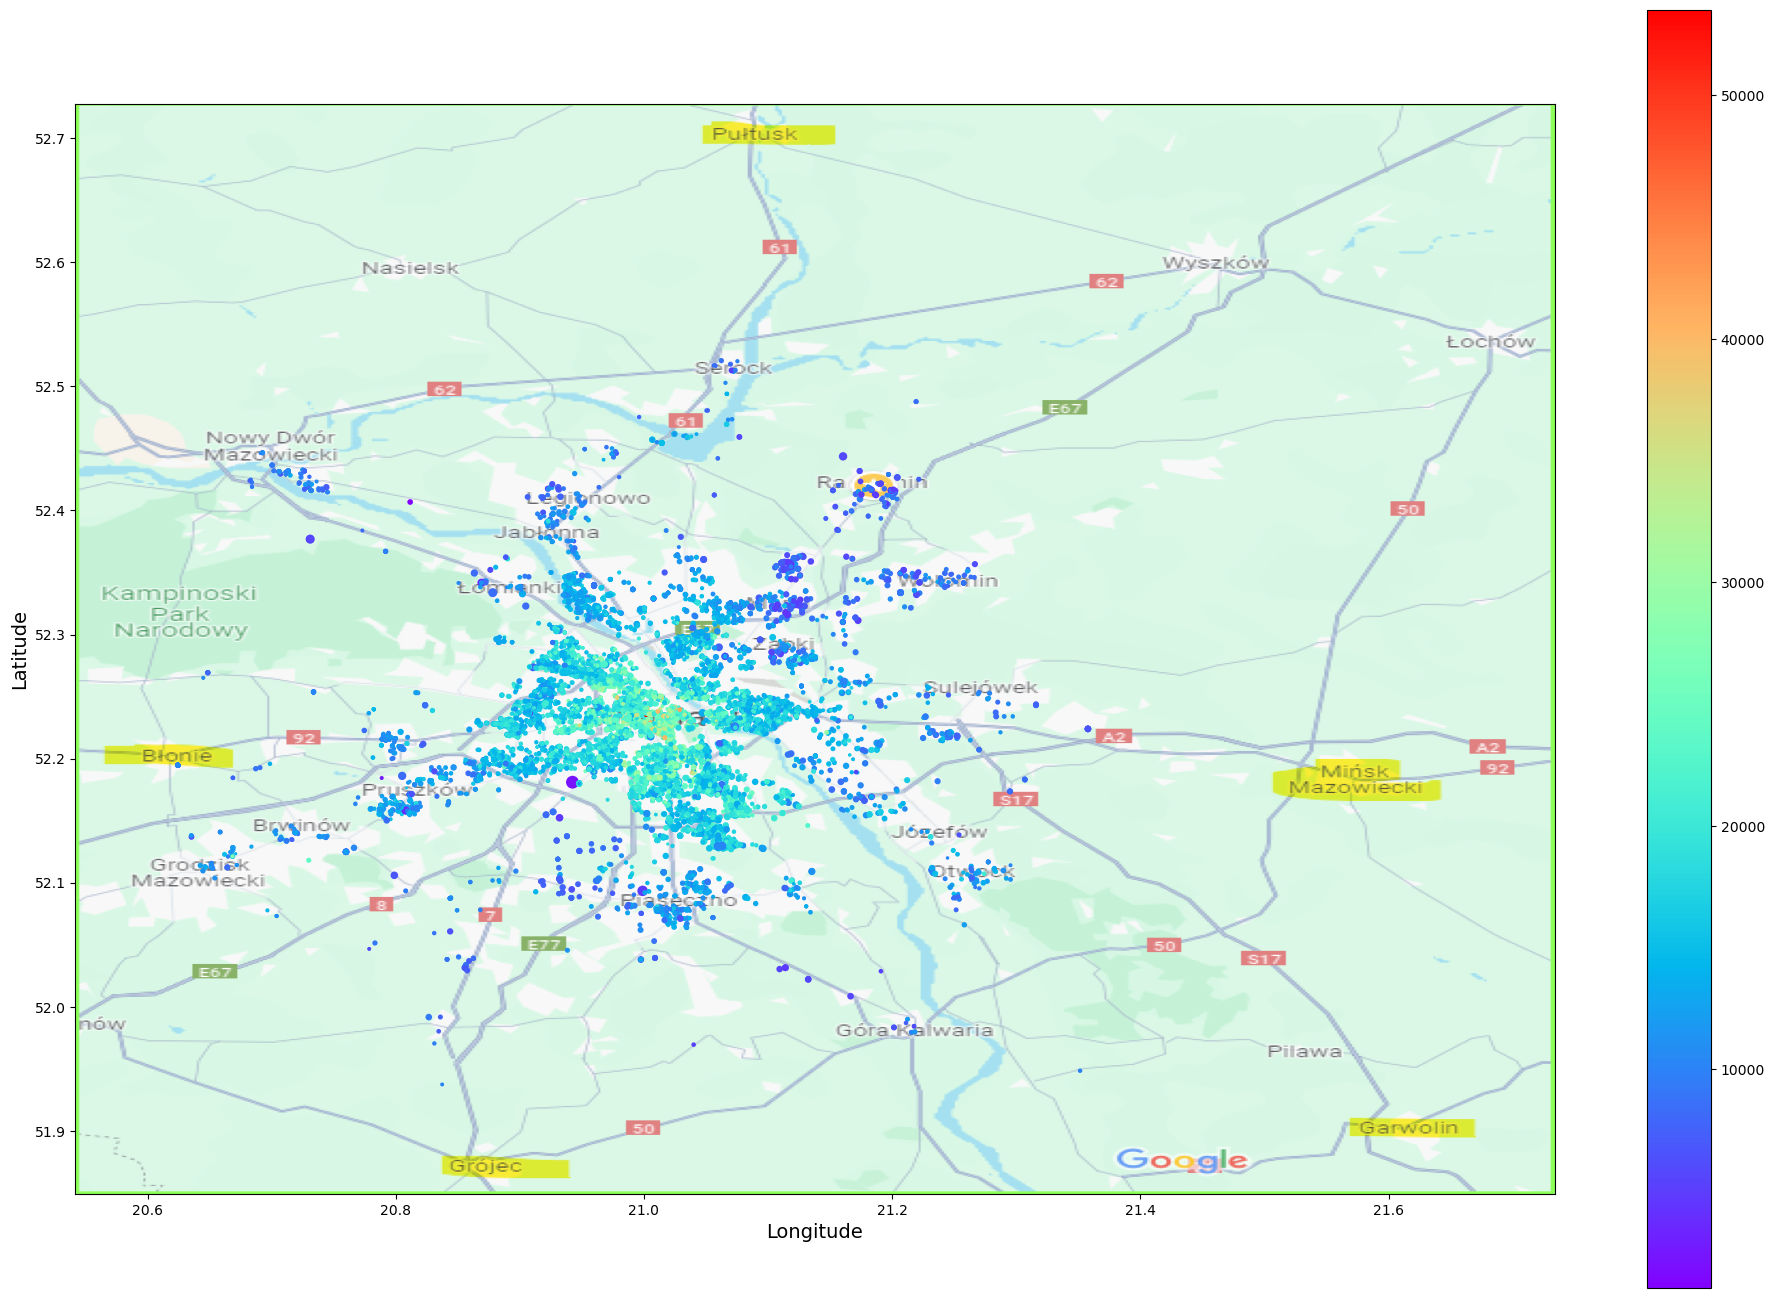

In [35]:
from PIL import Image

# latitude_top = 52.423667
# latitude_bottom = 52.05
# longitude_left = 20.840682
# longitude_right = 21.220630

latitude_top = 52.727631 # Max_Lat
latitude_bottom = 51.849226 # Min_Lat
longitude_left = 20.541704 # Min_Long
longitude_right = 21.733839 #Max_Long

warsaw_metro_2050_image_url = r'C:\Users\Purn\Documents\GitHub\Otodom_Scrapper_Analysis\photos\GoogleMapSnap.png'

image = np.array(Image.open(warsaw_metro_2050_image_url))

# plot the populations with density and colors
ax = df_cleaned.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.99,
            s = df_cleaned["surface_area"]/10,
            figsize = (6.93*2+10,8.30*2),
            c = df_cleaned["price"]/df_cleaned["surface_area"],
            cmap = plt.get_cmap("rainbow"),
            colorbar = True,
            sharex = True)

# Adjust the cali_image's x and y axis according to the longitutes and latitudes of the df_cleaned.
# plt.imshow(image, extent=[20.840682, 21.220630, 52.109328, 52.353667], alpha=0.4) # works, but horizontal, original estimated coordinates
plt.imshow(image, extent=[longitude_left, longitude_right, latitude_bottom, latitude_top], alpha=0.8) # coordinates are adjustable
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices = df_cleaned["price"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(cmap = "rainbow")
# cbar.ax.set_yticklabels(["zł %dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('House Price', fontsize=16)

plt.show()

## Stats-Model (Data Analysis)
### OLS: Oridinary Least Square

In [36]:
import statsmodels.api as sm

print(df_cleaned.shape)
df_OLS = df_cleaned[['price', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building']].dropna().astype(float)
X = df_OLS.drop(['price'], axis=1)
y = df_OLS[['price']]
print(X.dtypes)
print(y.dtypes)
print(X.shape)
print(y.shape)

(14805, 12)
surface_area              float64
num_of_room               float64
floor                     float64
num_floors_in_building    float64
dtype: object
price    float64
dtype: object
(14021, 4)
(14021, 1)


In [37]:
X = sm.add_constant(np.asarray(X))
y = np.asarray(y)
OLS_model = sm.OLS(y, X).fit()

print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     3203.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:31:14   Log-Likelihood:            -1.9879e+05
No. Observations:               14021   AIC:                         3.976e+05
Df Residuals:                   14016   BIC:                         3.976e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.296e+05   1.01e+04     12.892      0.0

In [38]:
import plotly.express as px
px.imshow(df_OLS.corr())

## Hypothesis Testing
### Null Hypothesis (H0): A <U>will-be-ready-to-live</U> house is cheaper than a <U>ready-to-live</U> house.
### Alternative Hypothesis (H1): A <U>will-be-ready-to-live</U> house is NOT cheaper so buying it will give no significant benefit for the buyer.

In [39]:
price_living = df[df['finish_condition'] == 'for living']['price'].astype(float)
price_finishing = df[df['finish_condition'] == 'for finishing']['price'].astype(float)
print(price_living.shape)
print(price_finishing.shape)
print(price_living.dtype)
print(price_finishing.dtype)

(7475,)
(6016,)
float64
float64


In [40]:
import scipy as sp
SIGNIFICANCE_LEVEL = 0.05

t_stat, p_value = sp.stats.ttest_ind(price_living, price_finishing)
print(t_stat, p_value)

rejecting = p_value < SIGNIFICANCE_LEVEL
print("NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.")
print(("" if rejecting else "Not ") + "possible to reject the null hypothesis")

nan nan
NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.
Not possible to reject the null hypothesis
